# Numpy/Matplotlib Hints

Below are some quick hints in numpy/matplotlib that should help you with the kmeans assignment, should you choose to take advantage of them

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Selection

First, let's create a point cloud.  As is the usual default (except for NMF, which is the tranpose), we'll express our point cloud as a data matrix, where each point is along a row, and the dimension are along a column.  This means that for $N$ points in 2 dimensions, we'll have an $N \times 2$ matrix.  Let's generate such a matrix below, where each coordinate is chosen independently according to a unit Gaussian distribution

In [2]:
N = 1000
X = np.random.randn(N, 2)

We can plot it by plotting the first column as the x coordinate and the second column as the y coordinate.  We can pull a particular column out with slice notation, where we say take all of the rows :, but only a particulary column

(-4.245998126648476, 3.8389067742899003, -3.27162836180269, 3.583049022490485)

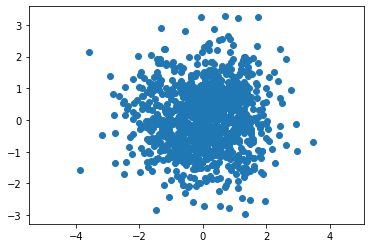

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis("equal")

Next, let's consider how we pull certain points out of this point cloud.  Let's say we wanted to select all points that have a distance of at most 1 from the origin.  We could make a good old python loop to do this and to filter out the elements that meet our criteria into some list Y, and then plot it

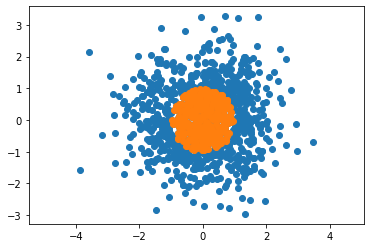

In [4]:
Y = []
for i in range(N):
    x = X[i, 0]
    y = X[i, 1]
    dist = np.sqrt(x**2 + y**2)
    if dist < 1:
        Y.append([x, y])
# Convert this 2D list to a 2D numpy array so we can
# do 2D slicing for plotting
Y = np.array(Y)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Y[:, 0], Y[:, 1])
plt.axis("equal");

But numpy also has a very nice feature known as "boolean selection" which allows us to do this without a python loop.  First, we create a parallel array with $N$ elements, each of which holds the corresponding point's distance from the origin.  

In [5]:
d = np.sqrt(np.sum(X[:, 0]**2 + X[:, 1]**2))

Notice how I'm actually doing a "element-wise operations" here; when I say X[:, 0]**2, I'm raising every element of the first column of X to the second power and creating a new array with that result.  I can then add this element-wise to the same array 

Anyway, since this array is parallel to the rows in X, we can use a boolean expression of it in place of a slice to take elements out

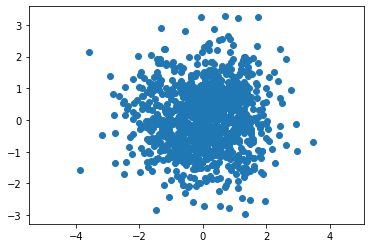

In [6]:
Y = X[d < 1, :] # This is it!
Y = np.array(Y)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Y[:, 0], Y[:, 1])
plt.axis("equal");

Just one more quick note that an even faster way to compute the distances is by using the np.sum method, and this will generalize to higher dimensions

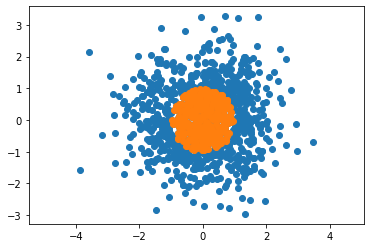

In [7]:
d = np.sqrt(np.sum(X**2, axis=1))
Y = X[d < 1, :]
Y = np.array(Y)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Y[:, 0], Y[:, 1])
plt.axis("equal");

## Taking Means

The mean of a point cloud is obtained by taking the mean of each coordinate individually. Let's compute the mean of X a more tedious way using loops

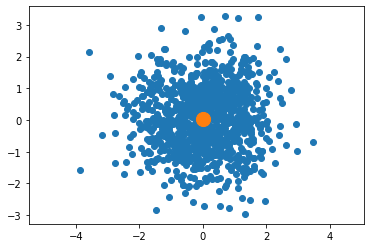

In [8]:
mean = np.zeros(2)
for i in range(N):
    mean += X[i, :]
mean = mean/X.shape[0]

plt.scatter(X[:, 0], X[:, 1])
plt.scatter([mean[0]], [mean[1]], 200) # Draw the mean in orange
plt.axis("equal");

But actually, there's a really nice function in numpy called np.mean.  If we pass it an "axis" parameter, it tells us the axis along which to vary the loop when taking the mean.  Since each point is in a different row, we want to vary the rows (axis 0) while we're taking the mean here, so we could do this simply as

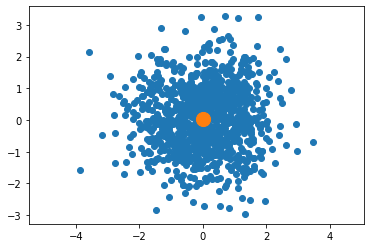

In [9]:
mean = np.mean(X, axis=0) # That's it!
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([mean[0]], [mean[1]], 200) # Draw the mean in orange
plt.axis("equal");